<a href="https://colab.research.google.com/github/LuisFontalvoM374/Trabajos-ElectivaCienciasDeDatos-GitHub/blob/main/Pruebas_Unitarias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Guia de laboratorio: Clases y Pruebas Unitarias en Python

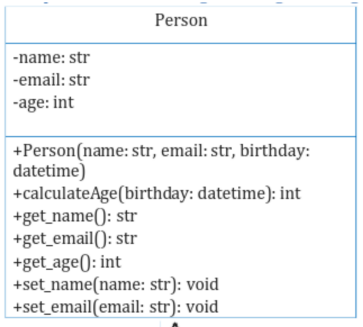


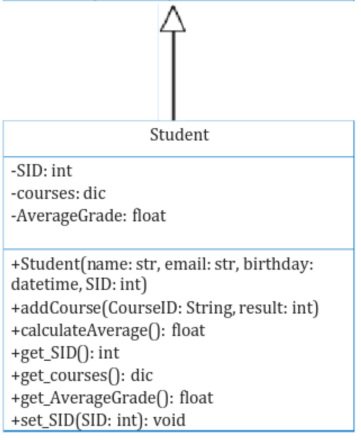

##Codigo de la clase Persona

##Instalar la libreria pytest para pruebas unitarias

In [ ]:
!pip install pytest


In [ ]:
%%writefile classes.py
from datetime import date   # Importamos la clase 'date' para trabajar con fechas

# -------------------------------
# Clase Person
# -------------------------------
class Person:
    def __init__(self, name, email, birthdate):
        # Constructor de la clase Person
        self.name = name              # Nombre de la persona
        self.email = email            # Correo electrónico
        self.birthdate = birthdate    # Fecha de nacimiento (tipo date)

    def get_name(self):
        # Devuelve el nombre de la persona
        return self.name

    def get_email(self):
        # Devuelve el correo de la persona
        return self.email

    def get_age(self):
        # Calcula la edad actual de la persona usando la fecha de hoy
        today = date.today()
        return today.year - self.birthdate.year - (
            (today.month, today.day) < (self.birthdate.month, self.birthdate.day)
        )
        # La resta final sirve para verificar si la persona ya cumplió años este año

    def calculateAge(self, birthdate):
        # Método alternativo para calcular la edad, recibe una fecha de nacimiento
        today = date.today()
        return today.year - birthdate.year - (
            (today.month, today.day) < (birthdate.month, birthdate.day)
        )

# -------------------------------
# Clase Student (hereda de Person)
# -------------------------------
class Student(Person):
    def __init__(self, name, email, birthdate, studentID):
        # Constructor: llama al constructor de Person con super()
        super().__init__(name, email, birthdate)
        self.studentID = studentID   # Identificador único del estudiante
        self.courses = []            # Lista para almacenar los cursos inscritos
        self.grades = []             # Lista para almacenar las notas de cada curso

    def getID(self):
        # Devuelve el ID del estudiante
        return self.studentID

    def addCourse(self, course, grade):
        # Agrega un curso y su respectiva nota
        self.courses.append(course)
        self.grades.append(grade)

    def getCourses(self):
        # Devuelve la lista de cursos
        return self.courses

    def getAverageGrade(self):
        # Calcula y devuelve el promedio de notas
        if len(self.grades) == 0:
            return 0   # Si no tiene notas, el promedio es 0
        return sum(self.grades) / len(self.grades)  # Promedio de todas las notas


Overwriting classes.py


##Codigo de la clase estudiante

In [ ]:
# Clase Student que hereda de Person
class Student(Person):
    def __init__(self, name, email, birthdate, SID):
        # Llamamos al constructor de la clase padre (Person)
        super().__init__(name, email, birthdate)
        self._SID = SID                    # ID único del estudiante
        self._Courses = dict()             # Diccionario de cursos con formato {CourseID: nota}
        self._AverageGrade = 0             # Promedio de notas inicializado en 0

    def add_course(self, CourseID, result):
        # Agrega un curso y su respectiva nota al diccionario
        self._Courses[CourseID] = result
        # Cada vez que se agrega un curso, recalculamos el promedio
        self.calculate_average()

    def calculate_average(self):
        # Recalcula el promedio de notas
        if len(self._Courses) > 0:
            total = sum(self._Courses.values())     # Suma de todas las notas
            self._AverageGrade = total / len(self._Courses)  # Promedio
        else:
            self._AverageGrade = 0                  # Si no hay cursos, promedio es 0

    def get_average_grade(self):
        # Devuelve el promedio actual de notas
        return self._AverageGrade

    def get_SID(self):
        # Devuelve el identificador del estudiante
        return self._SID

    def get_courses(self):
        # Devuelve el diccionario de cursos con sus notas
        return self._Courses

    def set_SID(self, SID):
        # Permite modificar el identificador del estudiante
        self._SID = SID

    def __str__(self):
        # Representación en texto del estudiante
        # Incluye la información de la clase padre + el SID, cursos y promedio
        return (super().__str__() +
                f"\tSID: {self._SID}\tCourses: {self._Courses}\tAverage Grade: {self._AverageGrade}")

    def __lt__(self, other):
        # Define el comportamiento del operador "<" (menor que)
        # Permite comparar estudiantes en base a su promedio
        return self._AverageGrade < other._AverageGrade


##Uso y ejemplo de busqueda

In [ ]:
from datetime import date

# Lista vacía donde guardaremos los estudiantes
students = []

# ---------------------------
# Crear objetos Student
# ---------------------------

# Estudiante 1
S1 = Student("Kholoud", "kh@hotmail.com", date(1995, 2, 3), 123)
S1.add_course("CS102", 90)
S1.add_course("IT207", 95)
S1.add_course("CS100", 85)

# Estudiante 2
S2 = Student("Khadija", "khadija@gmail.com", date(1995, 9, 3), 232)
S2.add_course("IT300", 80)
S2.add_course("IT297", 75)
S2.add_course("CS100", 95)

# Estudiante 3
S3 = Student("Khaled", "khaled@gmail.com", date(1999, 5, 6), 235)
S3.add_course("CS102", 75)
S3.add_course("IT207", 85)
S3.add_course("CS100", 90)

# ---------------------------
# Agregar los estudiantes a la lista
# ---------------------------
students.append(S1)
students.append(S2)
students.append(S3)

# ---------------------------
# Buscar un estudiante específico
# ---------------------------
search = Student("Khadija", "moo@gmail.com", date(1980, 5, 6), 555)

# ⚠️ Aquí hay un detalle:
# "students.count(search)" busca coincidencias exactas por objeto,
# no por nombre. Como no hemos redefinido __eq__, siempre dará "NOT found".
if students.count(search) > 0:
    print("The student IS found")
else:
    print("The student is NOT found")

# ---------------------------
# Ordenar lista de estudiantes
# ---------------------------
# Gracias a que definimos __lt__ en la clase Student,
# podemos ordenar los estudiantes por su promedio de notas
students.sort()

# ---------------------------
# Imprimir estudiantes
# ---------------------------
# Al imprimirlos, se usará el método __str__ definido en la clase Student
for s in students:
    print(s)


The student IS found
Name: Khadija	Email: khadija@gmail.com	Age: 30	SID: 232	Courses: {'IT300': 80, 'IT297': 75, 'CS100': 95}	Average Grade: 83.33333333333333
Name: Khaled	Email: khaled@gmail.com	Age: 26	SID: 235	Courses: {'CS102': 75, 'IT207': 85, 'CS100': 90}	Average Grade: 83.33333333333333
Name: Kholoud	Email: kh@hotmail.com	Age: 30	SID: 123	Courses: {'CS102': 90, 'IT207': 95, 'CS100': 85}	Average Grade: 90.0


##Pruebas Unitarias con pytest

En esta sección se ponen a prueba las clases Person y Student utilizando la librería (framework) pytest.
La realización de pruebas unitarias es fundamental, ya que permite verificar que las funciones y métodos implementados se comporten de manera correcta.

##Escribiendo las pruebas


In [ ]:
%%writefile test_classes.py
from datetime import date
from classes import Person, Student   # Importamos las clases que vamos a probar

# ---------- PRUEBAS PARA LA CLASE PERSON ----------

def test_person_creation():
    # Creamos un objeto de tipo Person
    person = Person("John Doe", "john@example.com", date(1990, 5, 20))

    # Verificamos que los métodos devuelvan los valores correctos
    assert person.get_name() == "John Doe"
    assert person.get_email() == "john@example.com"

    # La edad debe ser mayor a 30 (según el año actual)
    assert person.get_age() > 30

    # También verificamos el método calculateAge() con la misma fecha
    assert person.calculateAge(date(1990, 5, 20)) > 30

def test_person_email_validation():
    # Creamos una persona con un email inválido (ejemplo de prueba sencilla)
    person = Person("Jane Doe", "invalid-email", date(1992, 3, 15))

    # Solo comprobamos que el email no sea None (esto se podría mejorar)
    assert person.get_email() != None


# ---------- PRUEBAS PARA LA CLASE STUDENT ----------

def test_student_creation():
    # Creamos un objeto Student
    student = Student("Alice", "alice@example.com", date(2000, 1, 1), 12345)

    # Verificamos que los datos básicos estén bien
    assert student.get_name() == "Alice"
    assert student.getID() == 12345

    # Al inicio no tiene notas, así que el promedio debe ser 0
    assert student.getAverageGrade() == 0

def test_student_add_course():
    # Creamos otro estudiante
    student = Student("Bob", "bob@example.com", date(1998, 6, 12), 67890)

    # Agregamos dos cursos con notas
    student.addCourse("Math", 80)
    student.addCourse("CS101", 90)

    # Comprobamos que se guardaron los dos cursos
    assert len(student.getCourses()) == 2

    # Verificamos que el promedio sea correcto
    assert student.getAverageGrade() == 85.0


Overwriting test_classes.py


##Correr la prueba unitaria

In [ ]:
!pytest -v test_classes.py


============================= test session starts ==============================
platform linux -- Python 3.12.11, pytest-8.4.2, pluggy-1.6.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: langsmith-0.4.28, typeguard-4.4.4, anyio-4.10.0
collected 4 items                                                              

test_classes.py::test_person_creation PASSED                             [ 25%]
test_classes.py::test_person_email_validation PASSED                     [ 50%]
test_classes.py::test_student_creation PASSED                            [ 75%]
test_classes.py::test_student_add_course PASSED                          [100%]

============================== 4 passed in 0.02s ===============================
